# Ejercicio 1
Simular un trial usando el modelo de caminata al azar con los siguientes parámetros:

* número máximo de pasos de tiempo: 200

* drift = 0

* umbral = 10

* evidencia inicial (no sesgada)

Luego hacer un gráfico de la trayectoria de la evidencia

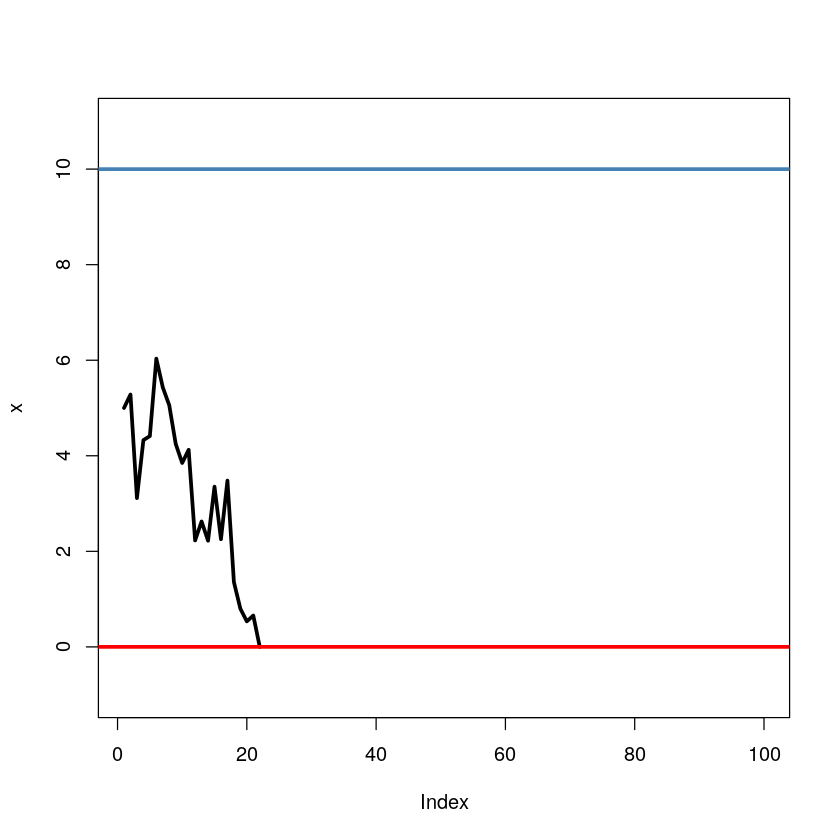

In [1]:
n_pasos <- 100
drift   <- 0.0
umbral  <- 10

x_ini <- umbral/2
x <- rep(NA, n_pasos) 
x[1] <- x_ini
i <- 1
while( i < n_pasos & x[i]>0 & x[i]<umbral  ){
    # Sampleo normal(drift, 1)
    x[i+1] <- x[i] + rnorm(1, mean=drift, sd=1)
    i <- i + 1
}
x[i] <- ifelse( x[i] > umbral, umbral, x[i])
x[i] <- ifelse( x[i] < 0, 0, x[i])
plot(x, type = 'l', xlim = c(1, n_pasos), ylim = c(-1,umbral+1), lwd=3, col = "black")
abline(umbral, 0, lwd=3, col="steelblue")
abline(0, 0, lwd=3, col="red")

# Ejercicio 2
Crear una función que simule n = 1000 trials y devuelva el tiempo de respuesta y la opción elegida en cada
trial.


In [2]:
rw_decisiones <- function(n_pasos=1000, drift=0, sd_rw=1, umbral=10, x_ini=umbral/2){
    x <- x_ini + cumsum( rnorm(n_pasos, mean=drift, sd=sd_rw) )
    rt <- which( x < 0 | x  > umbral )[1]
    resp <- sign(x[rt] - x_ini)
    out <- c(rt, resp)
    return(out)
}

In [3]:
rw_decisiones()

[1] 16  1

# Ejercicio 3

El tiempo de respuesta, en la práctica, no es igual al tiempo de acumulación de evidencia por varios motivos (por ejemplo, una vez que se acumuló suficiente evidencia, la acción motora de reportar la decisión lleva un tiempo).

Para tener en cuenta eso, modificar la función del ejercicio anterior llamando “tiempo de decisión” (td) al tiempo durante el cual se acumula evidencia y “tiempo de respuesta” (rt) a rt = td + t0, donde t0 es un parámetro que no varía entre trials y que podemos fijar en 50 pasos de tiempo.

In [4]:
rw_decisiones <- function(n_pasos=1000, drift=0, sd_rw=1, umbral=10, x_ini=umbral/2, t0=50){
    x  <- x_ini + cumsum( rnorm(n_pasos, mean=drift, sd=sd_rw) )
    td <- which( x < 0 | x  > umbral )[1]
    rt <- t0 + td
    resp <- sign(x[td] - x_ini)
    out <- c(rt, resp)
    return(out)
}

In [5]:
rw_decisiones(x_ini = 10/2)

[1] 54  1

# Ejercicio 4

Usar la funcion del ejercicio 3 para construir la probabilidad de elegir la opción correcta en función de la dificultad de la tarea.

Considerar que el drift es proporcional a la dificultad.

Usar 5 niveles de dificultad diferentes dentro de los 1000 trials.

In [6]:
#rw_decisiones <- function(n_pasos=1000, x_ini=0, drift=0, sd_rw=1, umbral=10){
#    x <- x_ini + cumsum( ___ )
#    rt <- which( ___ )[1]
#    resp <- sign( ___ )
#    out <- c(rt, resp)
#    return(out)
#}

N <- 10000
umbral <- 10
niveles <- 50 # <<< Uso 50 niveles de dificultad

drift <- sample(seq(-0.5, 0.5, length.out = niveles), N, replace=TRUE)

rw <- data.frame(drift=drift, rt=rep(NA, N), resp=rep(NA, N))

for (i in 1:N){
    out <- rw_decisiones(n_pasos=N, drift = drift[i], sd_rw = 1, umbral = umbral)
    rw$rt[i]   <- out[1]
    rw$resp[i] <- out[2]
}



Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



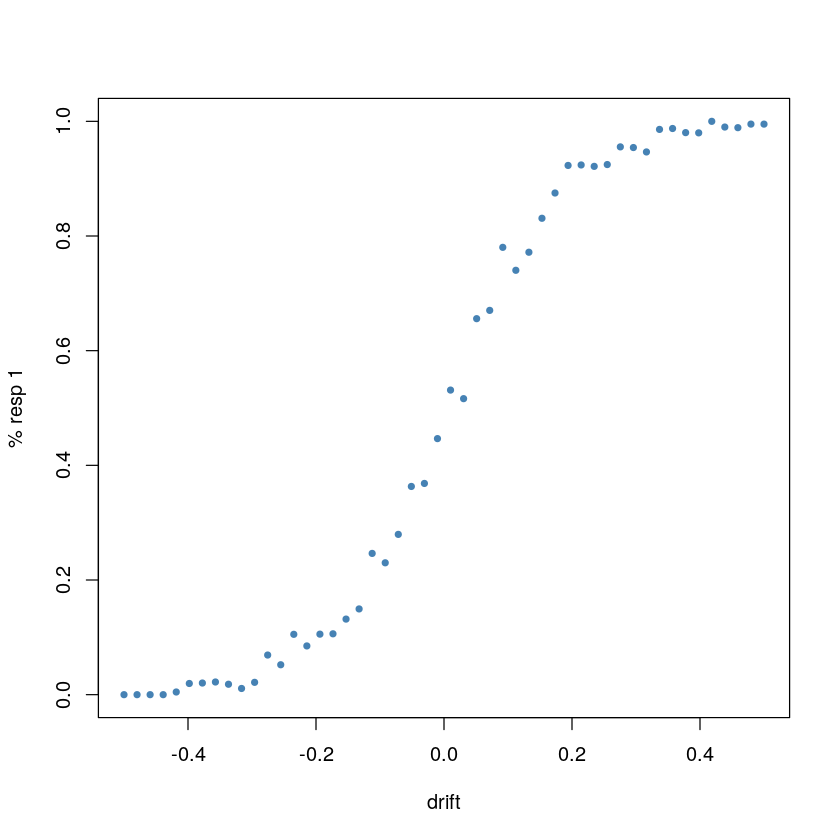

In [7]:
library(dplyr)

p <- rw %>%

group_by(drift) %>%

summarize(pc = mean(resp==1))

plot(p$drift, p$pc, xlab = "drift", ylab = "% resp 1", ylim=c(0,1), pch=20, col="steelblue")

In [8]:
#rw_decisiones <- function(n_pasos=1000, x_ini=0, drift=0, sd_rw=1, umbral=10){
#    x <- x_ini + cumsum( ___ )
#    rt <- which( ___ )[1]
#    resp <- sign( ___ )
#    out <- c(rt, resp)
#    return(out)
#}

N <- 1000
umbral <- 10
niveles <- 5

drift <- sample(seq(-0.5, 0.5, length.out = niveles), N, replace=TRUE)

rw <- data.frame(drift=drift, rt=rep(NA, N), resp=rep(NA, N))

for (i in 1:N){
    out <- rw_decisiones(n_pasos=N, drift = drift[i], sd_rw = 1, umbral = umbral)
    rw$rt[i]   <- out[1]
    rw$resp[i] <- out[2]
}


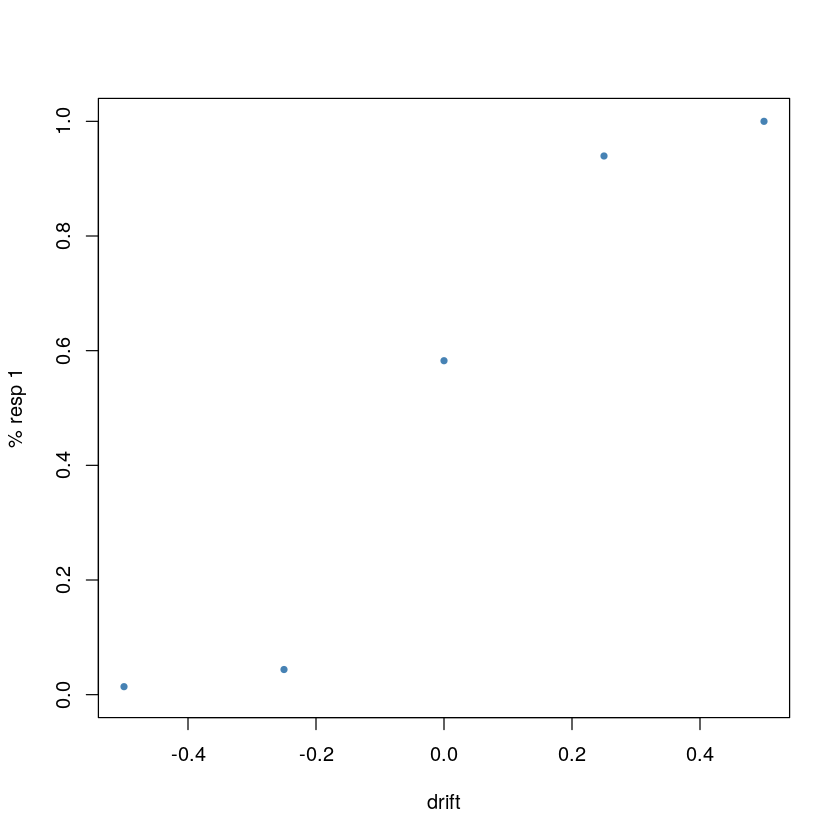

In [9]:
library(dplyr)

p <- rw %>%

group_by(drift) %>%

summarize(pc = mean(resp==1))

plot(p$drift, p$pc, xlab = "drift", ylab = "% resp 1", ylim=c(0,1), pch=20, col="steelblue")

# Ejercicio 5

Usar la funcion del ejercicio 3 para construir histogramas de los tiempos de respuesta para distintos valores de dificultad.


In [10]:
rw_decisiones <- function(n_pasos=1000, drift=0, sd_rw=1, umbral=10, x_ini=umbral/2, t0=50){
    x  <- x_ini + cumsum( rnorm(n_pasos, mean=drift, sd=sd_rw) )
    td <- which( x < 0 | x  > umbral )[1]
    rt <- t0 + td
    resp <- sign(x[td] - x_ini)
    out <- c(rt, resp)
    return(out)
}

In [11]:
niveles <- 5
dificultades <- seq(-0.5, 0.5, length.out = niveles)

In [12]:
N          <- 10000
drift      <- sample(dificultades, N, replace=TRUE)
rw         <- data.frame(drift=drift, rt=rep(NA, N), resp=rep(NA, N))
for (i in 1:N){
  out <- rw_decisiones(n_pasos=N, drift = drift[i], sd_rw = 1, umbral = umbral)
  rw$rt[i]   <- out[1]
  rw$resp[i] <- out[2]
}

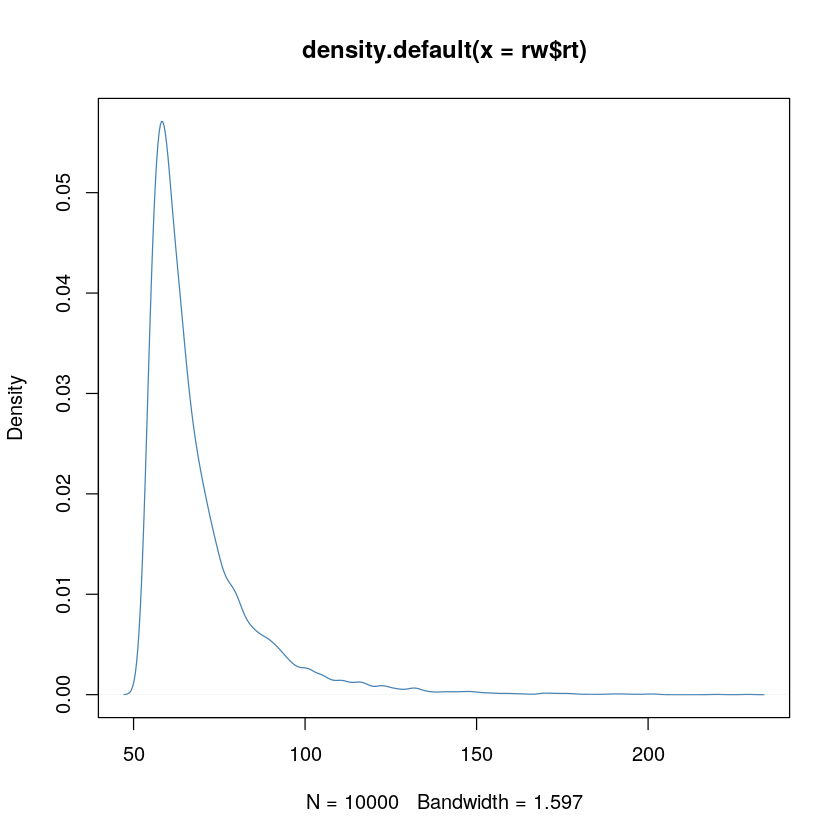

In [13]:
plot(density(rw$rt), col="steelblue")

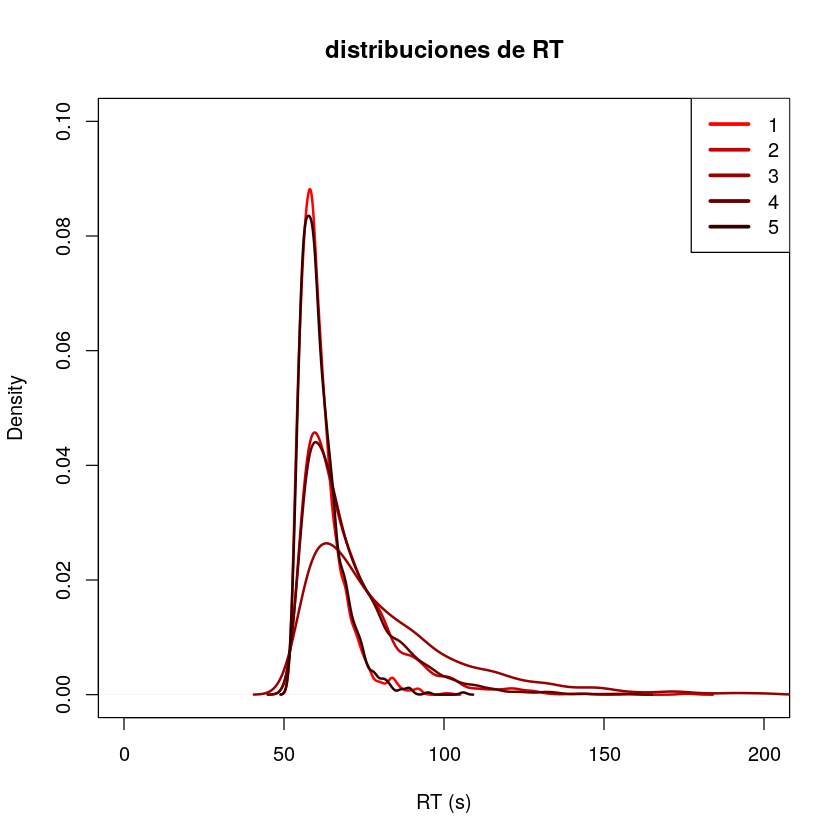

In [14]:
# para cada nivel de dificultad, hago un histograma de los tiempos de respuesta.
d1 <- filter(rw, rw$drift == dificultades[1])
plot(density(d1$rt), xlim=c(0,200), ylim=c(0,0.1), col=rgb(1,0,0), lwd=2, 
     main='distribuciones de RT', xlab="RT (s)")

d2 <- filter(rw, rw$drift == dificultades[2])
lines(density(d2$rt), xlim=c(0,200), ylim=c(0,0.01), col=rgb(0.8,0,0), lwd=2)

d3 <- filter(rw, rw$drift == dificultades[3])
lines(density(d3$rt), xlim=c(0,1200), ylim=c(0,0.01), col=rgb(0.6,0,0), lwd=2)

d4 <- filter(rw, rw$drift == dificultades[4])
lines(density(d4$rt), xlim=c(0,1200), ylim=c(0,0.01), col=rgb(0.4,0,0), lwd=2)

d5 <- filter(rw, rw$drift == dificultades[5])
lines(density(d5$rt), xlim=c(0,1200), ylim=c(0,0.01), col=rgb(0.2,0,0), lwd=2)

#d6 <- filter(rw,  rw$drift >= dificultades[5])
#lines(density(d6$rt), xlim=c(0,1200), ylim=c(0,0.01), col=rgb(0.1,0,0), lwd=2)

#legend(3, 1.5, legend = c('1','2','3','4','5'), lwd=3)
legend('topright', legend = c('1','2','3','4','5'), lwd=3, col=c(rgb(1,0,0),rgb(0.8,0,0),rgb(0.6,0,0),rgb(0.4,0,0),rgb(0.2,0,0)))

Notar que cómo las dificultades se repiten de manera simétrica:


In [15]:
dificultades

[1] -0.50 -0.25  0.00  0.25  0.50

tenemos histogramas muy similares para los tiempos de respuestas correspondientes a cada par.

